<a href="https://colab.research.google.com/github/wanjira234/wine-prediction-model/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Dependencies**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection**

In [9]:
#  loading dataset to a pandas dataframe
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [10]:
# number of rows and columns
print(wine_dataset.shape)

(1599, 12)


In [11]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# check for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [13]:
# check info of dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Data Analysis And Visualization**

In [14]:
# statistical measure of dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


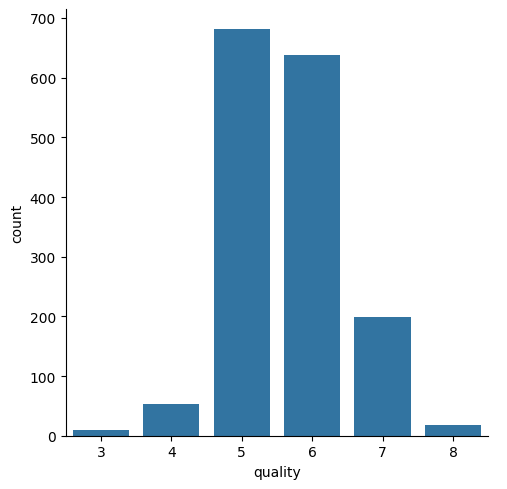

In [15]:
#  number of values for each quality
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

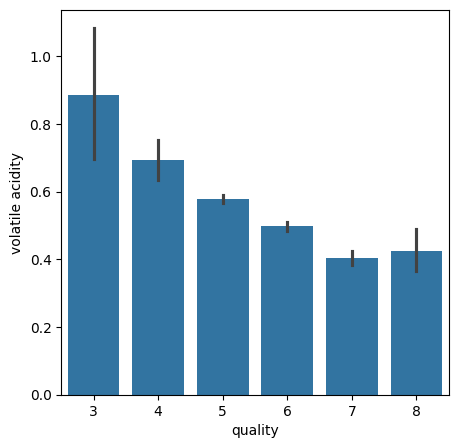

In [16]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)
# conclusion: the high the volatile the lower the quality

<Axes: xlabel='quality', ylabel='citric acid'>

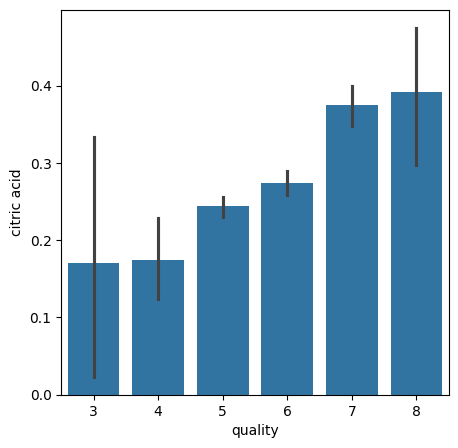

In [17]:
# citric acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

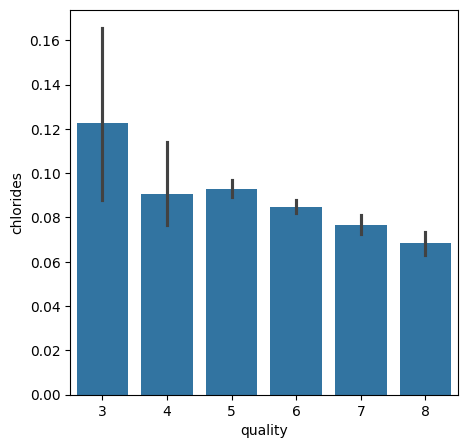

In [18]:
# chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)
# conclusion afect quality as much as the others but not with a large margin

<Axes: xlabel='quality', ylabel='residual sugar'>

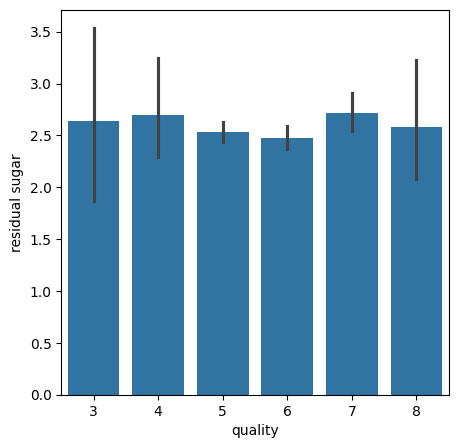

In [19]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)
# conclusion doesn't afect quality as much

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

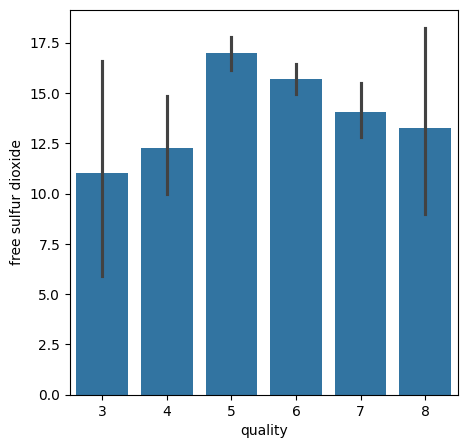

In [20]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset)
# conclusion doesn't afect quality as much not concliusive all over the place

<Axes: xlabel='quality', ylabel='pH'>

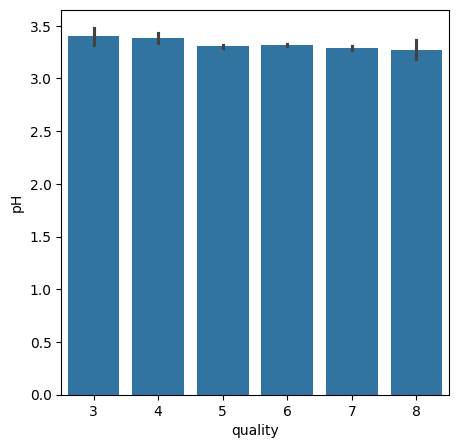

In [21]:
# cvolatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data=wine_dataset)
# conclusion: non conclusive Ph should always be high for any wine quality

<Axes: xlabel='quality', ylabel='alcohol'>

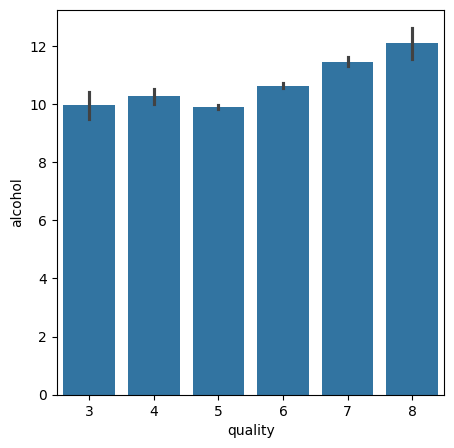

In [22]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)
# conclusion: the high the alcohol the higher the quality

**find correlation of the columns**

positive correlation --> linear


negative correlation --> inverse

In [23]:
correlation = wine_dataset.corr()

<Axes: >

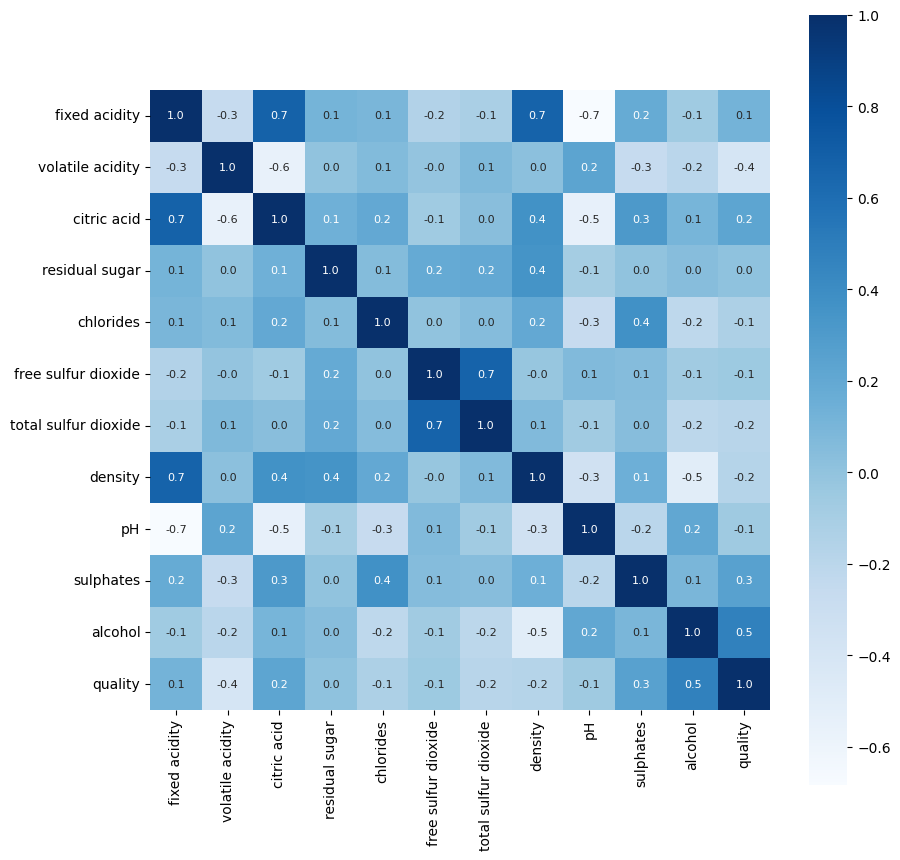

In [24]:
# constructing a heat map to better= understand the correlations between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

**Data Pre-Processing**

In [25]:
# seperate data and labels
X = wine_dataset.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Label Binarization**

Good wine ---> is >= 7


Bad wine ---> is <= 6

In [26]:
#  store the resplonse variable
Y = wine_dataset['quality'].apply(lambda Y_val: 1 if Y_val >=  7 else 0)

In [27]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Split dat into Train and Test Data**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [29]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


**Model Training using**

**Random Forest Classifier**

In [32]:
# model creation
model = RandomForestClassifier()


In [34]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Model Evaluation**

**Accuracy Score**

In [35]:
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [36]:
print("Accuracy is:", test_data_accuracy)

Accuracy is: 0.93125


**Building A Predictive System**

In [39]:
input_data = (12.6,0.31,0.72,2.2,0.07200000000000001,6.0,29.0,0.9987,2.88,0.82,9.8)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 1:
  print(f"{prediction} --> Good Quality Wine")
else:
  print(f"{prediction} --> Bad Qality Wine")

[1] --> Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**FInished**